In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["axes.unicode_minus"] = False

In [11]:
Data=pd.read_excel("C:/Users/SAMSUNG/Desktop/세미_프로젝트2/정훈/수정데이터/빅데이터.xlsx")
Data.drop(columns=sum([[Data.columns[0]],list(Data.columns[-4:-2])],[]),inplace=True)

In [16]:
dt=pd.DataFrame(Data[(Data["콘텐츠분류"]=="숙박")|(Data["콘텐츠분류"]=="음식점")])

In [17]:
행정구역 = {'구좌':'구좌',
  '조천':'조천', 
  '화북': '동제주','봉개':'동제주', '회천':'동제주','용강':'동제주',
  '오라':'중제주','아라':'중제주','오등':'중제주','화북':'중제주','이도':'중제주','건입':'중제주','삼도':'중제주','용담':'중제주','일도':'중제주', 
  '도두':'서제주','이호':'서제주','외도':'서제주','내도':'서제주','도평':'서제주','노형':'서제주','연동':'서제주','강정':'서제주','도순':'서제주',
  '영남':'서제주','월평':'서제주','해안':'서제주', '노형':'서제주',
  '애월' :'애월',
  '성산':'성산',
  '한림':'한림',
  '표선':'표선',
  '남원':'남원',
  '한경':'한경',
  '안덕':'안덕',
  '영천':'동서귀','동흥':'동서귀','효돈':'동서귀','송산':'동서귀','신효':'동서귀','하효':'동서귀','서귀':'동서귀','보목':'동서귀','동홍':'동서귀',
  '대천':'중서귀','대륜':'중서귀','서홍':'중서귀', '강정':'중서귀','법환':'중서귀','서호':'중서귀','호근':'중서귀',
  '여래':'서서귀','중문':'서서귀','회수':'서서귀', '하원':'서서귀','대포':'서서귀', '색달':'서서귀', '하예':'서서귀', '상예':'서서귀',  
  '대정':'대정'}

In [18]:
def trans(x):
    for i in 행정구역.keys():
        try:
            if i in x:
                return 행정구역[i]
        except:
            break

In [23]:
error=[]
dt.loc[dt["콘텐츠분류"]=="음식점","행정구역"]=dt.loc[dt["콘텐츠분류"]=="음식점","지번주소"].apply(lambda x:trans(x))

In [24]:
숙박=dt[dt["행정구역"].isna()==False]

Text(0.5, 1.0, '행정구역별 숙박 및 관광지 분포도')

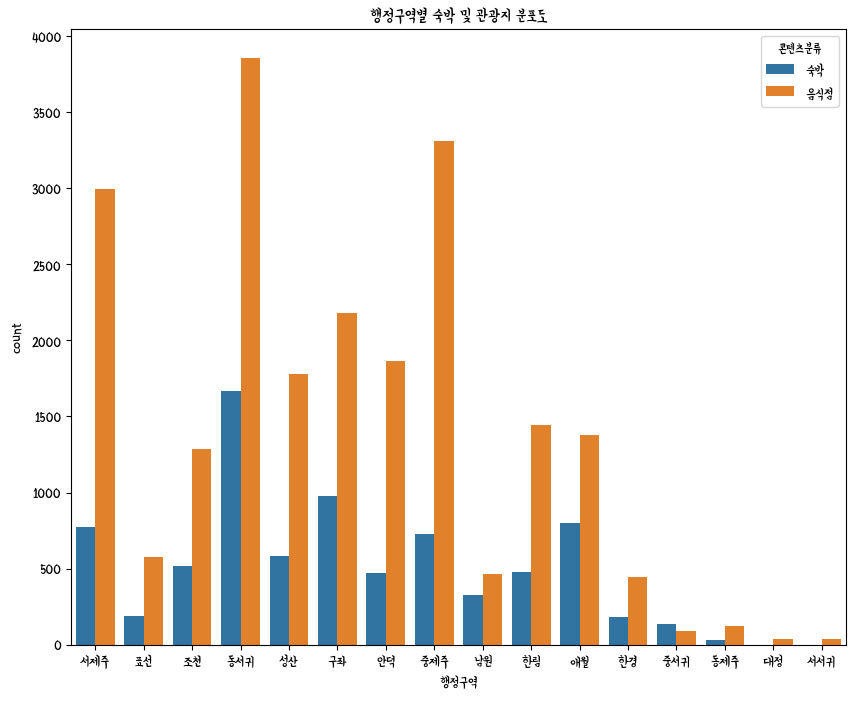

In [25]:
plt.figure()
sb.countplot(data=숙박,
             x="행정구역",
             hue="콘텐츠분류")
plt.title("행정구역별 숙박 및 관광지 분포도")

In [26]:
dt2=pd.DataFrame(숙박.groupby(["행정구역","콘텐츠분류"])["타이틀"].count()).unstack()
dt2

타이틀        
콘텐츠분류      숙박     음식점
행정구역                 
구좌      975.0  2179.0
남원      330.0   462.0
대정        NaN    38.0
동서귀    1668.0  3855.0
동제주      32.0   126.0
서서귀       NaN    38.0
서제주     772.0  2997.0
성산      585.0  1782.0
안덕      469.0  1864.0
애월      798.0  1380.0
조천      520.0  1286.0
중서귀     134.0    87.0
중제주     725.0  3310.0
표선      187.0   579.0
한경      185.0   445.0
한림      481.0  1446.0

In [27]:
dt2.columns

MultiIndex([('타이틀',  '숙박'),
            ('타이틀', '음식점')],
           names=[None, '콘텐츠분류'])

Text(0, 0.5, '숙박업')

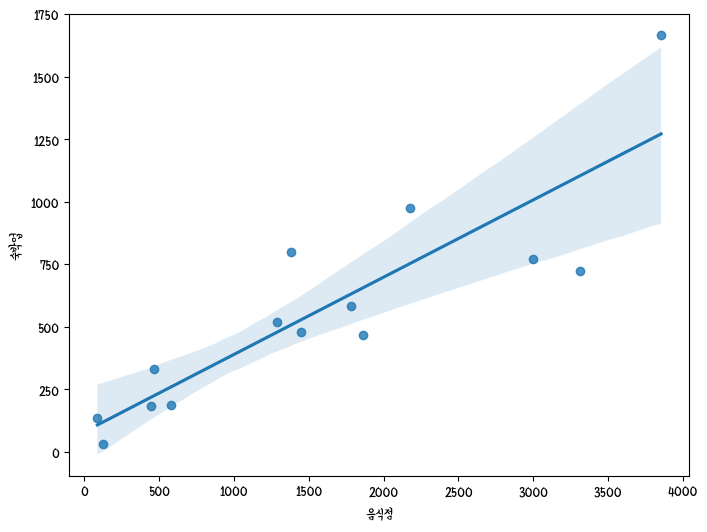

In [29]:
plt.rcParams["figure.figsize"] = (8, 6)
sb.regplot(x=dt2[('타이틀', '음식점')],
            y=dt2[('타이틀', '숙박')])
plt.xlabel("음식점")
plt.ylabel("숙박업")

In [30]:
dt3=pd.DataFrame(숙박.groupby(["행정구역"])["평점"].mean())
dt3=dt3.rename(columns={"평점": "평균평점"})
dt3_1=pd.DataFrame(숙박[숙박["콘텐츠분류"]=="음식점"].groupby(["행정구역"])["타이틀"].count())
dt3_1.rename(columns={"타이틀":"음식점개수"},inplace=True)
data3_2=pd.merge(dt3.reset_index(),dt3_1.reset_index()).set_index("행정구역",drop=True)

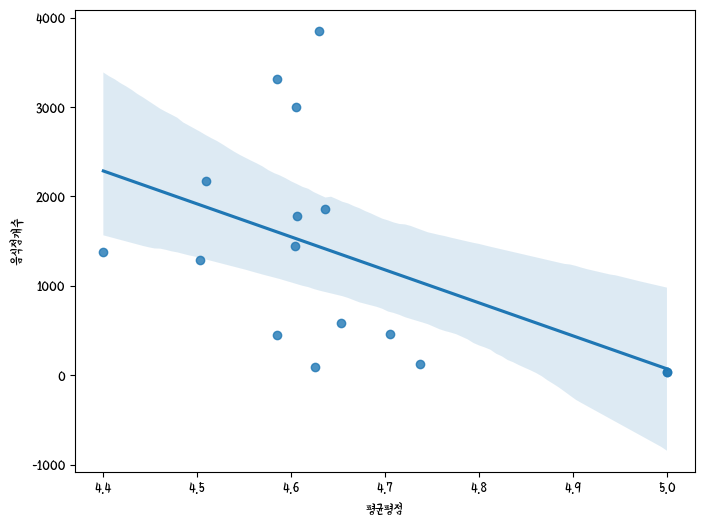

In [31]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.figure()
sb.regplot(x=data3_2[data3_2.columns[0]],
            y=data3_2[data3_2.columns[1]])
plt.show()

Text(0, 0.5, '숙박업평점')

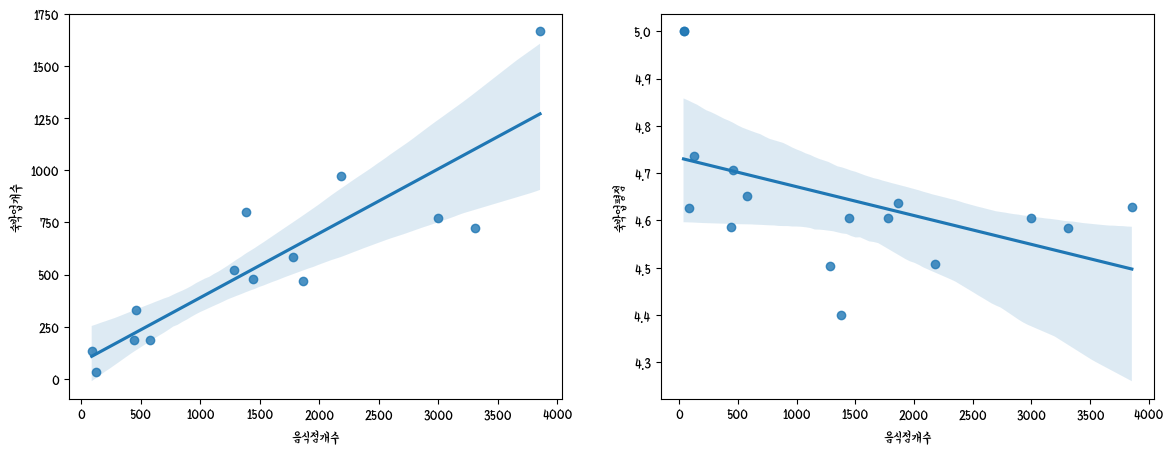

In [39]:
plt.rcParams["figure.figsize"] = (14, 5)
x,y=plt.subplots(1,2)
sb.regplot(ax=y[0],
    x=dt2[('타이틀', '음식점')],
            y=dt2[('타이틀', '숙박')])
sb.regplot(ax=y[1],
           x=data3_2[data3_2.columns[1]],
            y=data3_2[data3_2.columns[0]])
y[0].set_xlabel("음식점개수")
y[0].set_ylabel("숙박업개수")
y[1].set_xlabel("음식점개수")
y[1].set_ylabel("숙박업평점")